In [ ]:
from sympy import *
from sympy.plotting import plot 
# m = 3

In [ ]:
# y′′ + p(x)y′ + q(x)y = f(x)

p = lambda x: 0
q = lambda x: 1+x**2
f = lambda x: -1

phi0 = lambda x: 0
phi1 = lambda x: 1 - x**2
phi2 = lambda x: x**2 * (1 - x**2)

In [ ]:
var('x a1 a2')
yn = phi0(x) + a1*phi1(x) + a2*phi2(x)
yn

a1*(1 - x**2) + a2*x**2*(1 - x**2)

In [ ]:
diff1 = diff(yn,x)
diff2 = diff(yn,x,2)

collocation_points = [
-1/2, # X1
 0, # X2
 1/2, # X3
]

expressions = []

for point in collocation_points:
    # y′′ + p(x)y′ + q(x)y = f(x)
    expression = Eq(diff2.subs(x, point) + p(point) * diff1.subs(x, point) + q(point) * yn.subs(x, point), f(point))
    expressions.append(expression)

c1, c2 = linsolve(expressions,[a1,a2]).args[0]
result = c1*phi1(x) + c2*phi2(x)

result

-0.0216216216216216*x**2*(1 - x**2) - 0.956756756756757*x**2 + 0.956756756756757

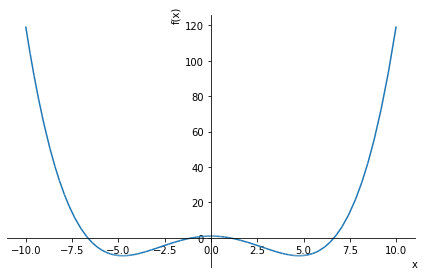

In [ ]:
plot(c1*phi1(x) + c2*phi2(x))

In [ ]:
var('a1 a2 a3 a4 a5') 
a = -1
b = 1

x0 = -1/2
x1 = 0
x2 = 1/2

yn = phi0(x) + a1*phi1(x) + a2*phi2(x)
diff1 = diff(yn,x,1)
diff2 = diff(yn,x,2)

residual_0 = diff2 + diff1*p(x0)+yn*q(x0)-f(x0)
residual = diff2.subs(x,x0) + diff1.subs(x,x0)*p(x0)+yn.subs(x,x0)*q(x0)-f(x0)

init_printing(use_unicode=False, wrap_line=False)
I = Symbol('I')
I = integrate(residual_0**2,(x,a,b))
print(I)

expr1 = Eq(diff(I, a1,1),0)
expr2 = Eq(diff(I, a2,1),0)


c1, c2 = linsolve([expr1, expr2], [a1, a2]).args[0]

c1*phi1(x) + c2*phi2(x)

3.0*a1**2 + 13.8095238095238*a1*a2 - 4.66666666666667*a1 + 31.584126984127*a2**2 - 7.33333333333333*a2 + 2.0


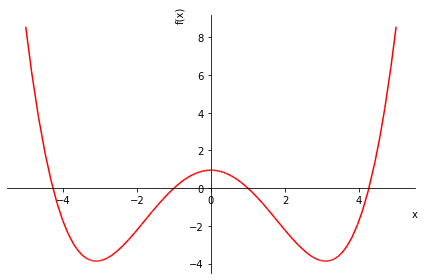

In [ ]:
import random
S = Symbol('S')
N = 10


def sum(N):
    G = Symbol('G')
    G = 0
    for i in range(N):
        x0 = random.randint(-100, 100)/100
        nevazka = diff2.subs(x, x0) + diff1.subs(x, x0) * \
            p(x0)+yn.subs(x, x0)*q(x0)-f(x0)
        G += nevazka**2
    return G


S = sum(N)

expr1 = Eq(diff(S, a1, 1), 0)
expr2 = Eq(diff(S, a2, 1), 0)
linsolve([expr1, expr2], [a1, a2])

plot(0.953181422441887*phi1(x) - 0.0524068909307402 *
     phi2(x), (x, -5, 5), line_color='red')


In [ ]:
a_mas = []
N = 4
for i in range(1,N,1):
    a_mas.append('a' + str(i))
    a_mas[i-1] = Symbol('a' + str(i))

a = 0
b = 1

def p(x):
    return 0
def q(x):
    return 1
def f(x):
    return x

def fi0(x):
    return 0
def fii(i,x):
    return x**i*(1-x)

yn = fi0(x)
N = 4

for i in range(1,N,1):
    yn += a_mas[i-1]*fii(i,x)
    
diff2 = diff(yn,x,2)
diff1 = diff(yn,x,1)

resudial = diff2 + diff1*p(x0)+yn*q(x0)-f(x0)

exp_list = []
for i in range(1,N,1):
    exp_list.append(Eq(integrate(resudial*fii(i,x),(x,a,b)),0))
    
linsolve(exp_list,a_mas)



In [ ]:
a11 = 0.273151277544959
a22 = 0.0231503640993024
a33 = -0.0223666278144643
a44 = -0.00156747256964581
a55 = 0.000783736284801099

    
    
print(yn.subs(a1,a11).subs(a2,a22))

a3*x**3*(1 - x) + 0.0231503640993024*x**2*(1 - x) + 0.273151277544959*x*(1 - x)


LAB

In [ ]:
k = 10
a = sin(k)
b = cos(k)

gr1 = -1
gr2 = 1 

def p(x):
    return 0
def q(x):
    return (1+b*x**2)/a
def f(x):
    return round(-1/a,5)
def fi(i,x):
    if i == 0:
        return 0
    return x**i*(1-x**2)


In [ ]:
# метод коллокации
def method_collocation(N, M):
    var('x x0')

    a_mas = []
    yn = fi(0,x)

    for i in range(1,N,1):
        a_mas.append('a' + str(i))
        a_mas[i-1] = Symbol('a' + str(i))
        yn += a_mas[i-1]*fi(i,x)
        
    diff2 = diff(yn,x,2)
    diff1 = diff(yn,x,1)

    mas_x = []
    exp_list = []
    
    x0 = -1
    dx = round(float(2)/float(M),5)
    for i in range(1,M,1):
        mas_x.append(round(x0,5))
        exp_list.append(Eq(diff2.subs(x,x0) + p(x0)*diff1.subs(x,x0) + q(x0)*yn.subs(x,x0) - f(x0),0))
        x0 += dx
        
        
    print('exp list\n')
    for i in exp_list:
        print(i)

    print('x values \n',mas_x)
    print('solution = \n', linsolve(exp_list,a_mas))
    
    return linsolve(exp_list,a_mas)

def fun_from_method_collocation(N,M):
    res_1 = list(method_collocation(N,M))
    res_2 = res_1[0]
    res_3 = list(res_2)
    

    dct = {}
    for i in range(len(res_3)):
        dct['a'+str(i+1)] = res_3[i]
        res_3[i] = round(res_3[i],5)

    yn = fi(0,x)
    
    for i in range(N-1):
        key = 'a' + str(i+1)
        yn += round(dct[key],5)*fi(i+1,x)
    
    print('yn = \n',yn)

    return yn


exp list

Eq(6*a1 - 10*a2 - 1.83816, 0)
Eq(1.99998*a1 + 0.6666933332*a2 + (-0.296294074062963*a1 + 0.0987637037074075*a2)*(0.1111088889*cos(10) + 1)/sin(10) - 1.83816, 0)
x values 
 [-1, -0.33333]
solution = 
 FiniteSet((1.0*(-39.2133945656033 - 4.35695670018147*cos(10) - 4235.13131528794*sin(10))/(56.8874666748445*cos(10) + 511.9974399712 - 5183.9913598272*sin(10)), 1.0*(-3.26781555862252 - 0.363083355848681*cos(10) - 44.1160614910698*sin(10))/(1.58020740763457*cos(10) + 14.2221511103111 - 143.9997599952*sin(10))))
yn = 
 0.23058*x**2*(1 - x**2) + 0.69066*x*(1 - x**2)


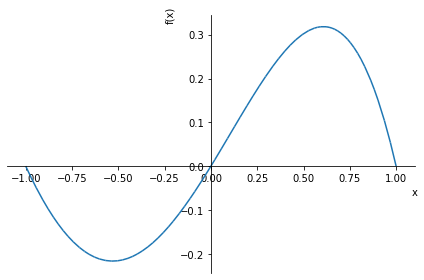

In [ ]:
plot(fun_from_method_collocation(3,3), (x, -1, 1))

exp list

Eq(6*a1 - 10*a2 + 14*a3 - 1.83816, 0)
Eq(3.0*a1 - 1.0*a2 - 0.5*a3 + (0.25*cos(10) + 1)*(-0.375*a1 + 0.1875*a2 - 0.09375*a3)/sin(10) - 1.83816, 0)
Eq(2*a2 - 1.83816, 0)
x values 
 [-1, -0.5, 0.0]
solution = 
 FiniteSet((1.0*(327214.499806502*cos(10) + 1308857.99922601 - 41883455.9752323*sin(10))/(1112574.84741211*cos(10) + 4450299.38964844 - 42722874.140625*sin(10)), 0.919080018997192, 1.0*(36.6411354448646*cos(10) + 146.564541779459 - 781.677556157112*sin(10))/(55.37109375*cos(10) + 221.484375 - 2126.25*sin(10))))
yn = 
 0.40628*x**3*(1 - x**2) + 0.91908*x**2*(1 - x**2) + 0.89016*x*(1 - x**2)


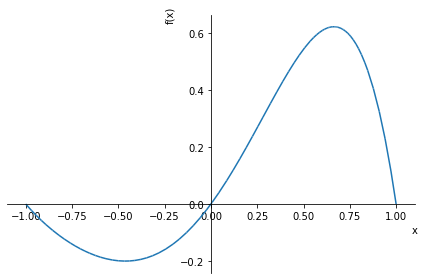

In [ ]:
plot(fun_from_method_collocation(4,4), (x, -1, 1))

метод наименьших квадратов. интегральный

In [ ]:
def mnk_int(N):
    var('x x0')

    a_mas = []
    yn = fi(0,x)

    for i in range(1,N,1):
        a_mas.append('a' + str(i))
        a_mas[i-1] = Symbol('a' + str(i))
        yn += a_mas[i-1]*fi(i,x)
    
    print(yn)
    diff2 = diff(yn,x,2)
    diff1 = diff(yn,x,1)
    
    resudial_1 = diff2 + p(x)*diff1 + q(x)*yn - f(x)
    resudial = diff2.subs(x,x0) + p(x0)*diff1.subs(x,x0) + q(x0)*yn.subs(x,x0) - f(x0)
    
    init_printing(use_unicode=False, wrap_line=False)
    I = Symbol('I')
    I = integrate(resudial_1**2,(x,gr1,gr2))
    
    exp_list = []
    for i in range(1,N,1):
        expr = Eq(diff(I,a_mas[i-1],1),0)
        print(expr)
        exp_list.append(expr)
    
    print(a_mas)
    
    return linsolve(exp_list,a_mas)



def fun_from_mnk_int(N):
    res_1 = list(mnk_int(N))
    res_2 = res_1[0]
    res_3 = list(res_2)

    dct = {}
    for i in range(len(res_3)):
        dct['a'+str(i+1)] = res_3[i]

    #print(dct)
    yn = fi(0,x)
    
    for i in range(N-1):
        key = 'a' + str(i+1)
        yn += round(dct[key],5)*fi(i+1,x)
    
    print(yn)

    return yn


a1*x*(1 - x**2) + a2*x**2*(1 - x**2) + a3*x**3*(1 - x**2) + a4*x**4*(1 - x**2)
Eq(0.307692*a3*cos(10)**2/sin(10)**2 + 0.181818*(2.0*a1*cos(10)**2 + 4.0*a3*cos(10) - 4.0*a3*cos(10)**2)/sin(10)**2 + 0.666667*(2.0*a1 - 24.0*a1*sin(10) + 72.0*a1*sin(10)**2 - 72.0*a3*sin(10)**2 + 12.0*a3*sin(10))/sin(10)**2 + 0.222222*(4.0*a1*cos(10) - 4.0*a1*cos(10)**2 + 2.0*a3*cos(10)**2 + 2.0*a3 - 8.0*a3*cos(10) + 52.0*a3*sin(10)*cos(10))/sin(10)**2 + 0.4*(24.0*a1*sin(10) - 24.0*a1*sin(10)*cos(10) - 4.0*a1 + 4.0*a1*cos(10) + 2.0*a3 + 12.0*a3*sin(10)*cos(10) - 64.0*a3*sin(10) + 240.0*a3*sin(10)**2)/sin(10)**2 + 0.285714*(2.0*a1*cos(10)**2 + 2.0*a1 - 8.0*a1*cos(10) + 24.0*a1*sin(10)*cos(10) - 64.0*a3*sin(10)*cos(10) + 52.0*a3*sin(10) - 4.0*a3 + 4.0*a3*cos(10))/sin(10)**2, 0)
Eq(16.0*a2 + 0.266667*a4*cos(10)**2/sin(10)**2 + 0.153846*(2.0*a2*cos(10)**2 + 4.0*a4*cos(10) - 4.0*a4*cos(10)**2)/sin(10)**2 + 0.666667*(-96.0*a2*sin(10)**2 + 8.0*a2*sin(10) + 48.0*a4*sin(10)**2 - 3.67632*sin(10) + 44.1158*sin(10)**2)

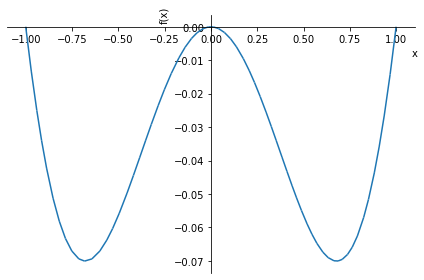

In [ ]:
plot(fun_from_mnk_int(5), (x, -1, 1))

a1*x*(1 - x**2) + a2*x**2*(1 - x**2)
Eq(0.363636*a1*cos(10)**2/sin(10)**2 + 0.222222*(4.0*a1*cos(10) - 4.0*a1*cos(10)**2)/sin(10)**2 + 0.666667*(2.0*a1 - 24.0*a1*sin(10) + 72.0*a1*sin(10)**2)/sin(10)**2 + 0.4*(24.0*a1*sin(10) - 24.0*a1*sin(10)*cos(10) - 4.0*a1 + 4.0*a1*cos(10))/sin(10)**2 + 0.285714*(2.0*a1*cos(10)**2 + 2.0*a1 - 8.0*a1*cos(10) + 24.0*a1*sin(10)*cos(10))/sin(10)**2, 0)
Eq(0.307692*a2*cos(10)**2/sin(10)**2 + 16.0*a2 + 0.181818*(4.0*a2*cos(10) - 4.0*a2*cos(10)**2)/sin(10)**2 + 0.666667*(-96.0*a2*sin(10)**2 + 8.0*a2*sin(10) - 3.67632*sin(10) + 44.1158*sin(10)**2)/sin(10)**2 + 0.222222*(2.0*a2*cos(10)**2 + 2.0*a2 - 8.0*a2*cos(10) + 48.0*a2*sin(10)*cos(10))/sin(10)**2 + 0.285714*(48.0*a2*sin(10) - 56.0*a2*sin(10)*cos(10) - 4.0*a2 + 4.0*a2*cos(10) + 3.67632*sin(10)*cos(10))/sin(10)**2 + 0.4*(2.0*a2 + 8.0*a2*sin(10)*cos(10) - 56.0*a2*sin(10) + 288.0*a2*sin(10)**2 + 3.67632*sin(10) - 3.67632*sin(10)*cos(10))/sin(10)**2 - 14.7053, 0)
[a1, a2]
-0.22588*x**2*(1 - x**2)


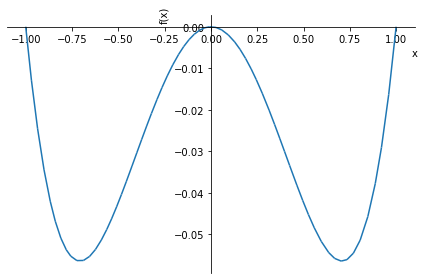

In [ ]:
plot(fun_from_mnk_int(3), (x, -1, 1))

метод наименьших квадратов. Дискретный

In [ ]:
def mnk_descr(N, M):
    var('x x0')
    a_mas = []
    yn = fi(0,x)

    for i in range(1,N,1):
        a_mas.append('a' + str(i))
        a_mas[i-1] = Symbol('a' + str(i))
        yn += a_mas[i-1]*fi(i,x)
    
    print(a_mas)
    print(yn)
    diff2 = diff(yn,x,2)
    diff1 = diff(yn,x,1)
    var('S')
    dx = float(2)/float(M)
    
    def sum(N):
        G = Symbol('G')
        G = 0
        x0 = -1
        for _ in range(M):
            x0 += dx
            nevazka = diff2.subs(x,x0) + diff1.subs(x,x0)*p(x0)+yn.subs(x,x0)*q(x0)-f(x0)
            G += nevazka**2
        return G
    
    S = sum(N)
    
    exp_list = []
    for i in range(1,N,1):
        expr = Eq(diff(S,a_mas[i-1],1),0)
        print(expr)
        exp_list.append(expr)
    
    print(a_mas)
    
    return linsolve(exp_list,a_mas)



def fun_from_mnk_descr(N, M):
    res_1 = list(mnk_descr(N, M))
    res_2 = res_1[0]
    res_3 = list(res_2)

    dct = {}
    for i in range(len(res_3)):
        dct['a'+str(i+1)] = res_3[i]

    yn = fi(0,x)
    
    for i in range(N-1):
        key = 'a' + str(i+1)
        yn += round(dct[key],5)*fi(i+1,x)

    print(yn)
    return yn


[a1, a2]
a1*x*(1 - x**2) + a2*x**2*(1 - x**2)
Eq(4.0*(-2 + 0.296296296296296*(0.111111111111111*cos(10) + 1)/sin(10))*(-a1 + 0.333333333333334*a2 + 0.5*(0.296296296296296*a1 + 0.0987654320987654*a2)*(0.111111111111111*cos(10) + 1)/sin(10) - 0.919080018997193) + 100.0*(-1.2 + 4.44089209850063e-17*(1.0*cos(10) + 1)/sin(10))*(-0.6*a1 - a2 + 0.1*(2.22044604925031e-16*a1 + 2.22044604925031e-16*a2)*(1.0*cos(10) + 1)/sin(10) - 0.183816003799439) + 4.0*(-0.296296296296296*(0.111111111111111*cos(10) + 1)/sin(10) + 2)*(a1 + 0.333333333333333*a2 + 0.5*(-0.296296296296296*a1 + 0.0987654320987654*a2)*(0.111111111111111*cos(10) + 1)/sin(10) - 0.919080018997192), 0)
Eq(4.0*(0.0987654320987654*(0.111111111111111*cos(10) + 1)/sin(10) + 0.666666666666667)*(-a1 + 0.333333333333334*a2 + 0.5*(0.296296296296296*a1 + 0.0987654320987654*a2)*(0.111111111111111*cos(10) + 1)/sin(10) - 0.919080018997193) + 100.0*(-2 + 4.44089209850063e-17*(1.0*cos(10) + 1)/sin(10))*(-0.6*a1 - a2 + 0.1*(2.22044604925031e-16*a1 + 2

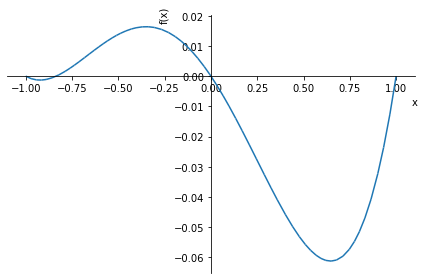

In [ ]:
plot(fun_from_mnk_descr(3,3), (x, -1, 1))

Метод Галеркина

In [ ]:
def galerkin_method(N):
    var('x x0')
    a_mas = []
    yn = fi(0,x)

    for i in range(1,N,1):
        a_mas.append('a' + str(i))
        a_mas[i-1] = Symbol('a' + str(i))
        yn += a_mas[i-1]*fi(i,x)
    
    diff2 = diff(yn,x,2)
    diff1 = diff(yn,x,1)

    nevyazka_1 = diff2 + p(x)*diff1 + q(x)*yn - f(x)

    mas_x = []
    exp_list = []
    
    for i in range(1,N,1):
        mas_x.append(x0)
        expr = integrate(nevyazka_1*fi(i,x),(x,gr1,gr2))
        exp_list.append(Eq(expr,0))
        print(expr)

    return linsolve(exp_list,a_mas)

def fun_from_galerkin_method(N):
    res_1 = list(galerkin_method(N))
    res_2 = res_1[0]
    res_3 = list(res_2)
    
    dct = {}
    for i in range(len(res_3)):
        dct['a'+str(i+1)] = res_3[i]

    yn = fi(0,x)
    
    for i in range(N-1):
        key = 'a' + str(i+1)
        yn += round(dct[key],5)*fi(i+1,x)

    print(yn)
    return yn


0.222222*a1*cos(10)/sin(10) + 0.666667*(1.0*a1 - 6.0*a1*sin(10))/sin(10) + 0.285714*(1.0*a1 - 2.0*a1*cos(10))/sin(10) + 0.4*(6.0*a1*sin(10) - 2.0*a1 + 1.0*a1*cos(10))/sin(10)
0.181818*a2*cos(10)/sin(10) + 1.33333*a2 + 0.222222*(1.0*a2 - 2.0*a2*cos(10))/sin(10) + 0.4*(1.0*a2 - 14.0*a2*sin(10) + 1.83816*sin(10))/sin(10) + 0.285714*(12.0*a2*sin(10) - 2.0*a2 + 1.0*a2*cos(10))/sin(10) - 1.22544
-0.54716*x**2*(1 - x**2)


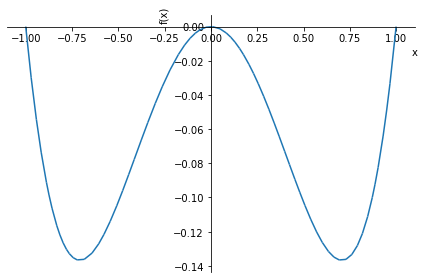

In [ ]:
plot(fun_from_galerkin_method(3), (x, -1, 1))

0.181818*a3*cos(10)/sin(10) + 0.666667*(1.0*a1 - 6.0*a1*sin(10) + 6.0*a3*sin(10))/sin(10) + 0.222222*(1.0*a1*cos(10) + 1.0*a3 - 2.0*a3*cos(10))/sin(10) + 0.285714*(1.0*a1 - 2.0*a1*cos(10) + 20.0*a3*sin(10) - 2.0*a3 + 1.0*a3*cos(10))/sin(10) + 0.4*(6.0*a1*sin(10) - 2.0*a1 + 1.0*a1*cos(10) + 1.0*a3 - 26.0*a3*sin(10))/sin(10)
1.33333*a2 + 0.153846*a4*cos(10)/sin(10) + 0.181818*(1.0*a2*cos(10) + 1.0*a4 - 2.0*a4*cos(10))/sin(10) + 0.4*(1.0*a2 - 14.0*a2*sin(10) + 12.0*a4*sin(10) + 1.83816*sin(10))/sin(10) + 0.222222*(1.0*a2 - 2.0*a2*cos(10) + 30.0*a4*sin(10) - 2.0*a4 + 1.0*a4*cos(10))/sin(10) + 0.285714*(12.0*a2*sin(10) - 2.0*a2 + 1.0*a2*cos(10) + 1.0*a4 - 42.0*a4*sin(10))/sin(10) - 1.22544
0.153846*a3*cos(10)/sin(10) + 0.4*(1.0*a1 - 6.0*a1*sin(10) + 6.0*a3*sin(10))/sin(10) + 0.181818*(1.0*a1*cos(10) + 1.0*a3 - 2.0*a3*cos(10))/sin(10) + 0.222222*(1.0*a1 - 2.0*a1*cos(10) + 20.0*a3*sin(10) - 2.0*a3 + 1.0*a3*cos(10))/sin(10) + 0.285714*(6.0*a1*sin(10) - 2.0*a1 + 1.0*a1*cos(10) + 1.0*a3 - 26.0*a

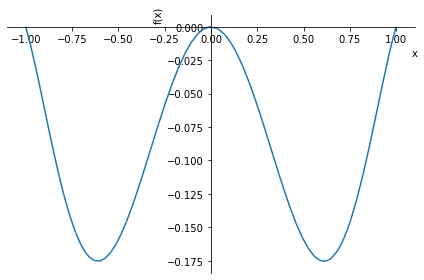

In [ ]:
plot(fun_from_galerkin_method(5), (x, -1, 1))